# Augraphy - Generate Shabby-pages example

In this example, [augraphy](https://github.com/sparkfish/augraphy) and  [shabby-pipeline](https://github.com/sparkfish/shabby-pages) are use to generate noisy images from the single image.


In [1]:
# Install augraphy in the system

!pip install git+https://github.com/sparkfish/augraphy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sparkfish/augraphy to /tmp/pip-req-build-cv6bkqi9
  Running command git clone --filter=blob:none --quiet https://github.com/sparkfish/augraphy /tmp/pip-req-build-cv6bkqi9
  Resolved https://github.com/sparkfish/augraphy to commit d864acf7edcd44257aa9137ec5f0ca7cd9141919
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for augraphy: filename=augraphy-8.1.0-py3-none-any.whl size=92196 sha256=fe616eb00081fad4252b0902cb78f261184ee31b964ba21449f32a645f84ef89
  Stored in directory: /tmp/pip-ephem-wheel-cache-qaw2g09h/wheels/df/9d/01/2dba985e62858d7c89a16dba9975740f31ef38af5d26b2c49e
Successfully built augraphy


In [2]:
# Download shabby-pages repository

import os 

# remove any existing folder (if there's any from the previous run)
if os.path.isdir("shabby-pages"):
  !rm -r shabby-pages

!git clone https://github.com/sparkfish/shabby-pages.git

%cd /content/shabby-pages

Cloning into 'shabby-pages'...
remote: Enumerating objects: 631, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 631 (delta 105), reused 148 (delta 97), pack-reused 458
Receiving objects: 100% (631/631), 89.07 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (340/340), done.
/content/shabby-pages


In [4]:
# Download paper texture

import gdown
import zipfile

# get the paper textures
id = "1114s61-GmHbhIn8f9YNz6OwS3CwkOsIp&confirm=t"
gdown.download(id=id, output="paper_textures.zip", quiet=True)

# extract the zip
with zipfile.ZipFile("paper_textures.zip", 'r') as zip_ref:
    zip_ref.extractall()

# fix the directory name
os.rename("paper textures", "paper_textures")

# remove zip file
!rm paper_textures.zip

In [5]:
# Download image

id = "1_Ka2FdR9NMAy3g_0bZvzXKhX53vlCtCJ&confirm=t"
gdown.download(id=id) 

Downloading...
From: https://drive.google.com/uc?id=1_Ka2FdR9NMAy3g_0bZvzXKhX53vlCtCJ&confirm=t
To: /content/shabby-pages/0600-Child_Welfare-Effects_of_Maltreatment_on_Brain_Development.pdf-19.png
100%|██████████| 445k/445k [00:00<00:00, 59.2MB/s]


'0600-Child_Welfare-Effects_of_Maltreatment_on_Brain_Development.pdf-19.png'

In [11]:
# Run pipeline and apply augmentation in the images

import cv2
from shabbypipeline import get_pipeline

clean = cv2.imread("/content/shabby-pages/0600-Child_Welfare-Effects_of_Maltreatment_on_Brain_Development.pdf-19.png")

pipeline = get_pipeline()

shabby = pipeline.augment(clean)["output"]

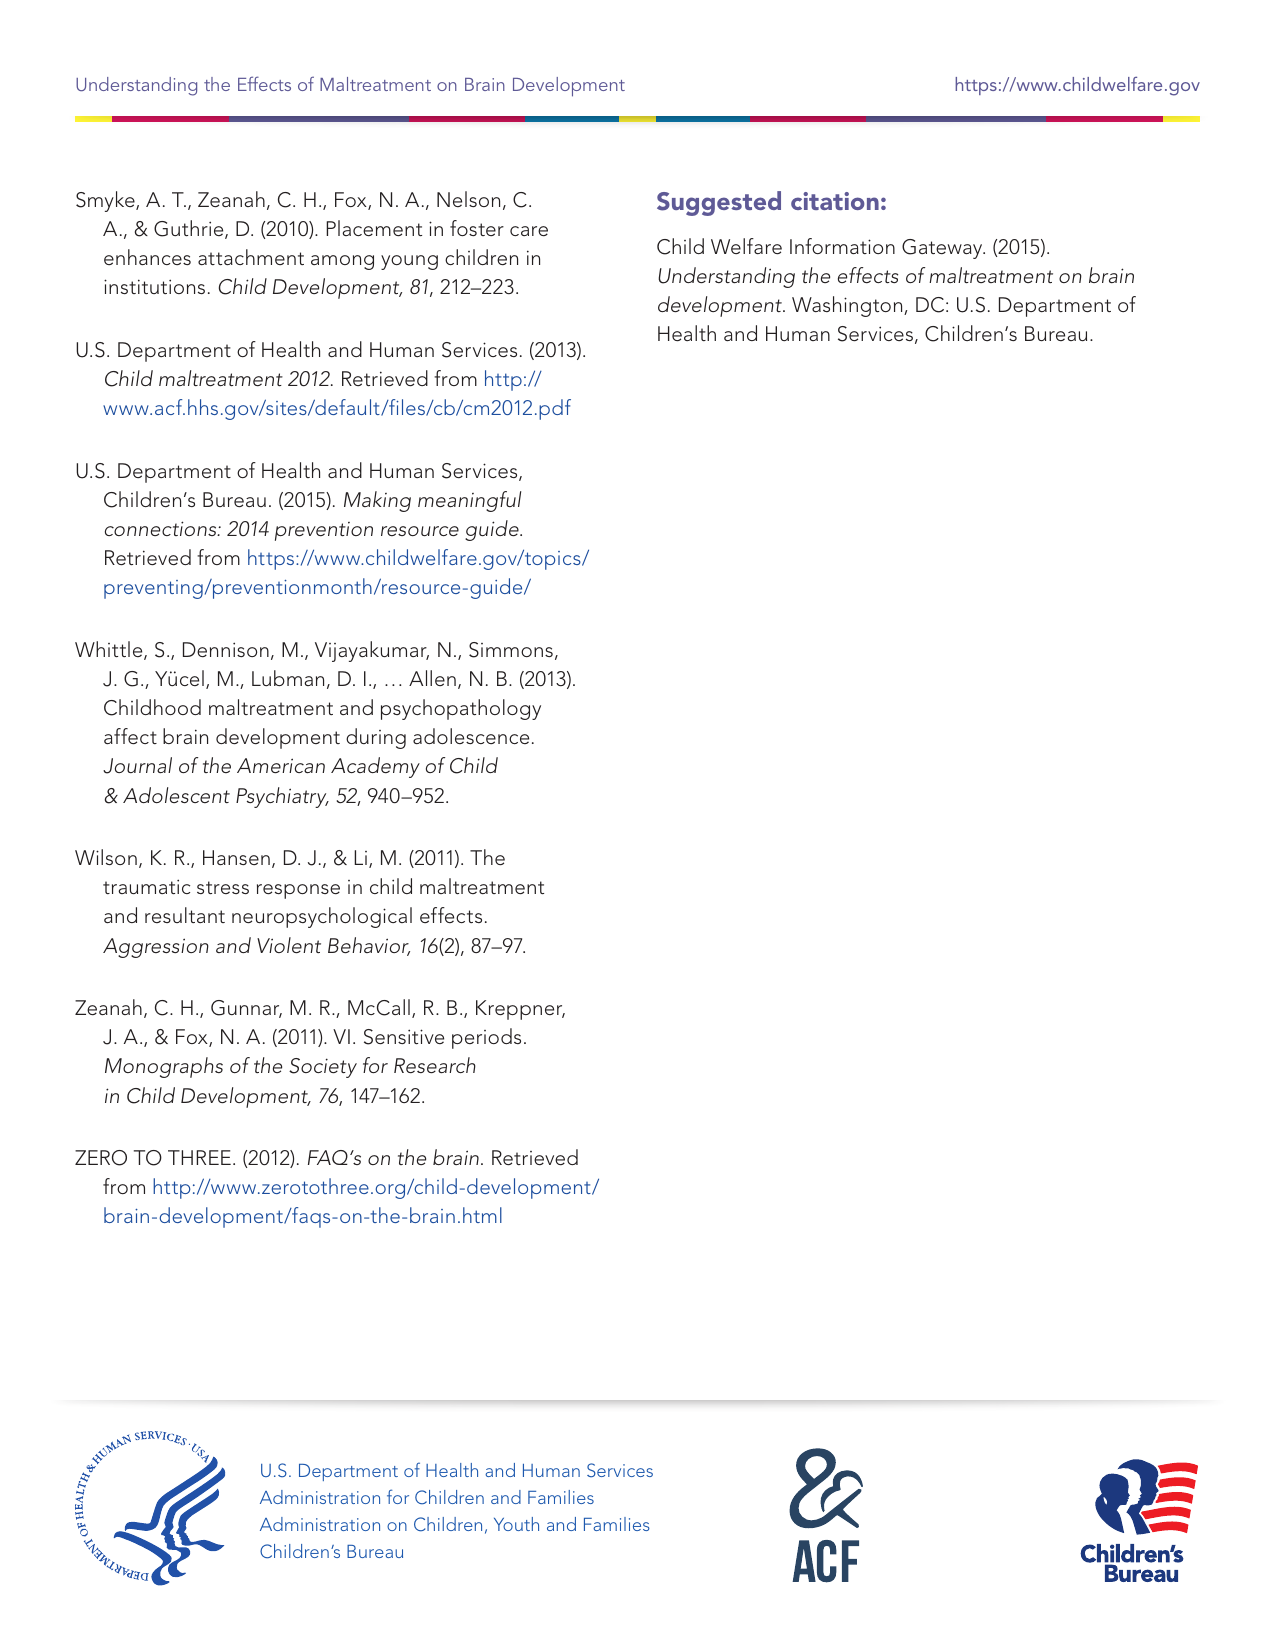

In [7]:
# Display input clean image

from google.colab.patches import cv2_imshow

cv2_imshow(clean)

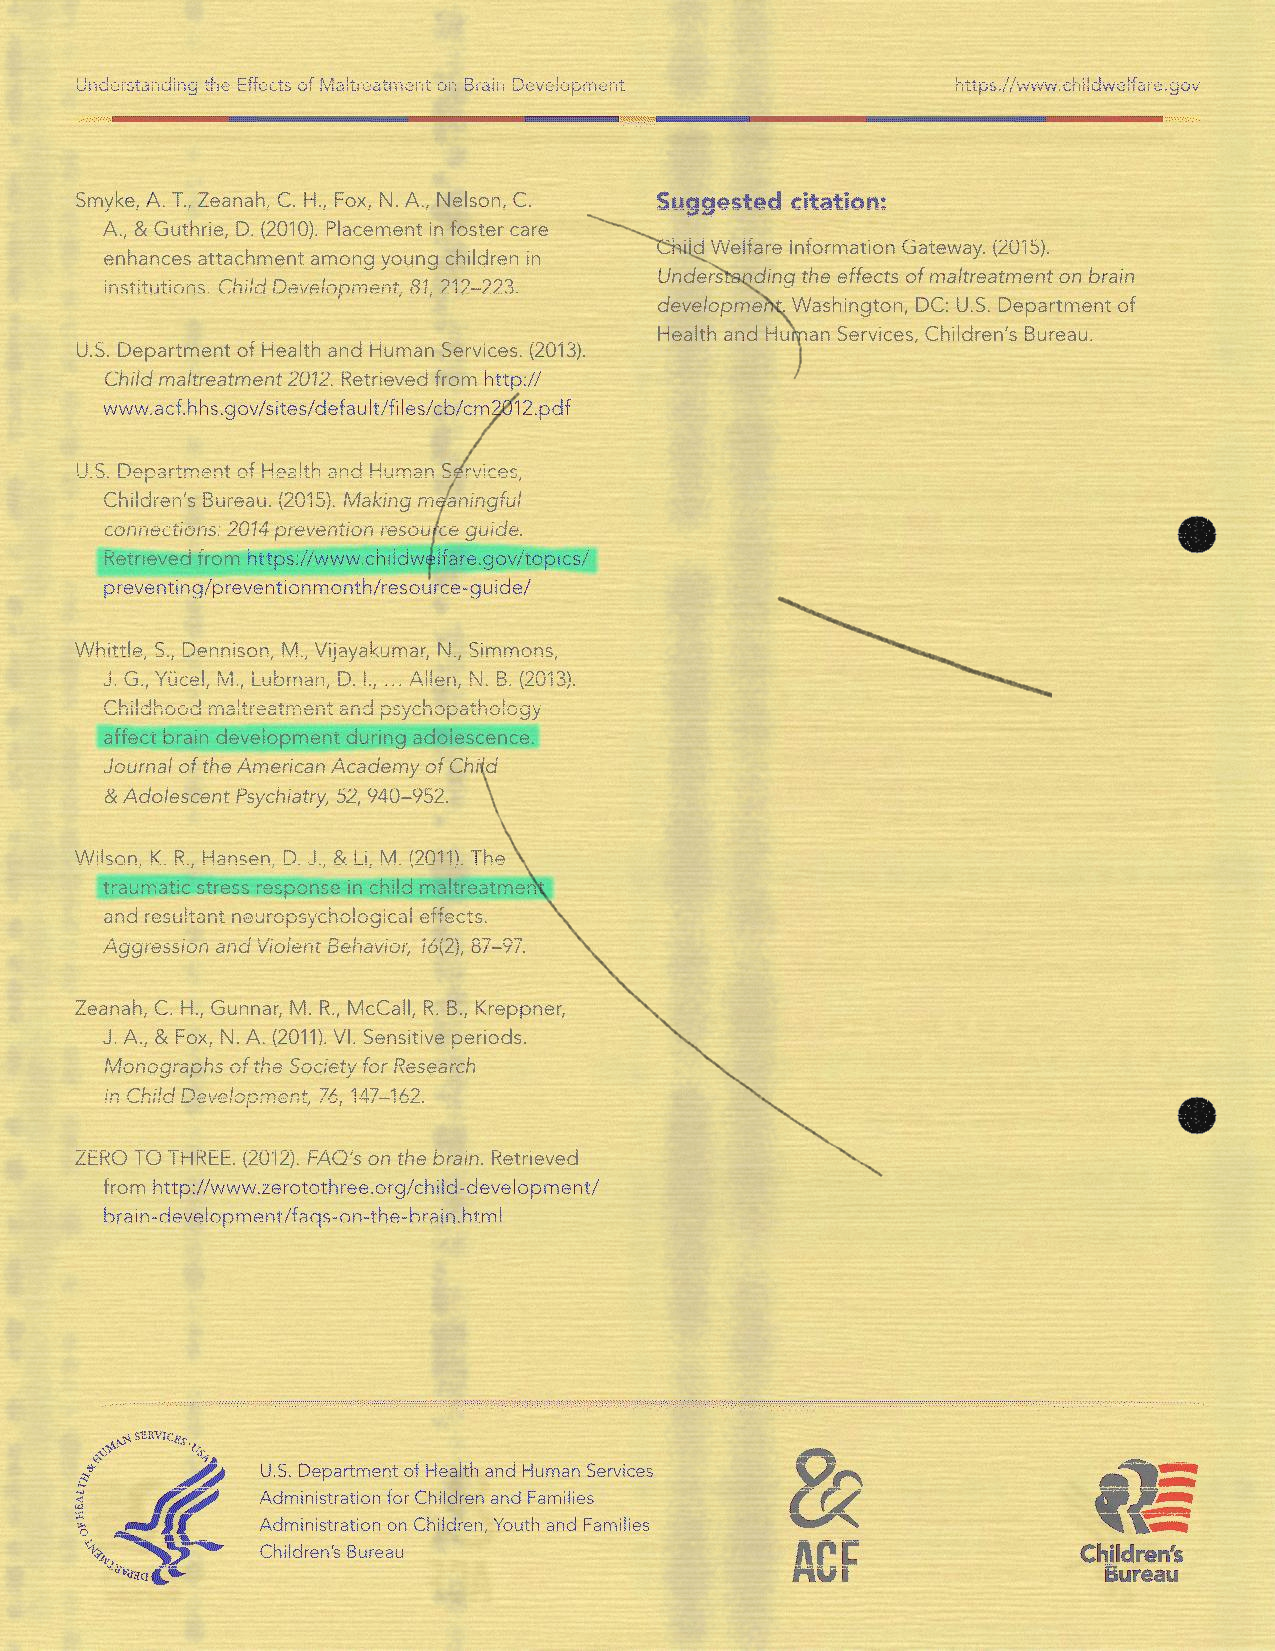

In [12]:
# Display augmented image

cv2_imshow(shabby)